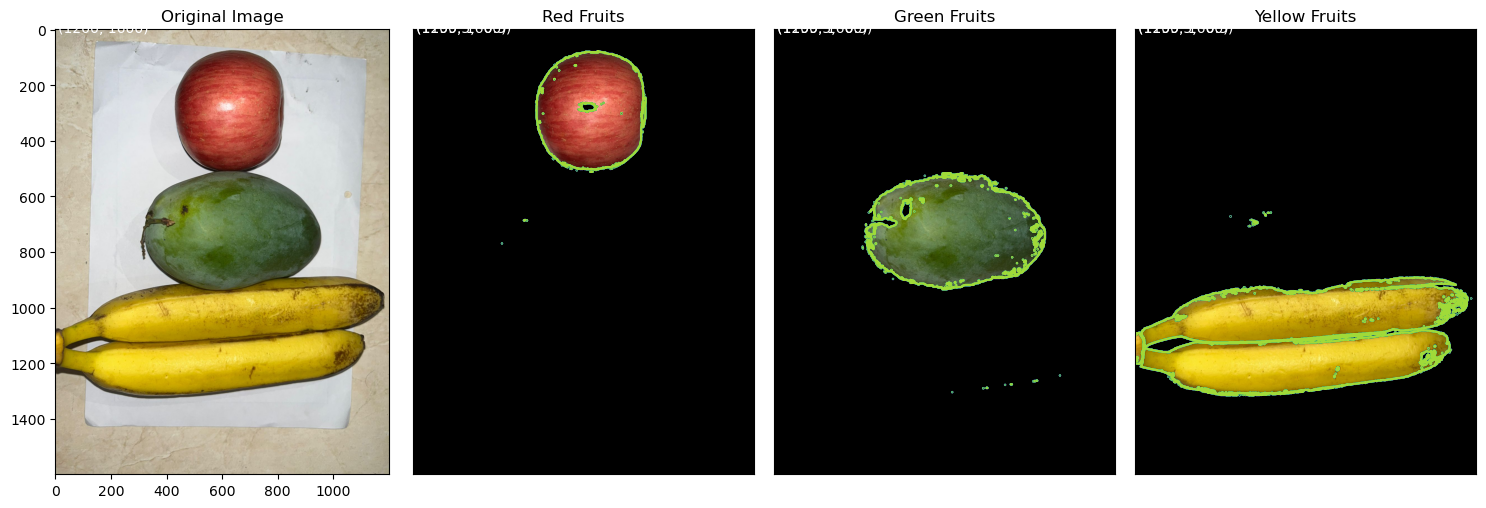

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def separate_fruits(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    lower_green = np.array([35, 50, 50], dtype=np.uint8)
    upper_green = np.array([90, 255, 255], dtype=np.uint8)

    lower_red = np.array([0, 70, 70], dtype=np.uint8)
    upper_red = np.array([10, 255, 255], dtype=np.uint8)

    lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
    upper_yellow = np.array([30, 255, 255], dtype=np.uint8)

    mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
    mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

    result_red = cv2.bitwise_and(image, image, mask=mask_red)
    result_green = cv2.bitwise_and(image, image, mask=mask_green)
    result_yellow = cv2.bitwise_and(image, image, mask=mask_yellow)

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))

    axs = axs.ravel()

    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[0].text(10, 10, f"({image.shape[1]}, {image.shape[0]})", color='white')

    axs[1].imshow(result_red)
    axs[1].contour(mask_red)
    axs[1].set_title('Red Fruits')
    axs[1].axis('on')
    axs[1].text(10, 10, f"({result_red.shape[1]}, {result_red.shape[0]})", color='white')

    axs[2].imshow(result_green)
    axs[2].contour(mask_green)
    axs[2].set_title('Green Fruits')
    axs[2].axis('on')
    axs[2].text(10, 10, f"({result_green.shape[1]}, {result_green.shape[0]})", color='white')

    axs[3].imshow(result_yellow)
    axs[3].contour(mask_yellow)
    axs[3].set_title('Yellow Fruits')
    axs[3].axis('on')
    axs[3].text(10, 10, f"({result_yellow.shape[1]}, {result_yellow.shape[0]})", color='white')

    # Rotate the images
    for ax in axs[1:]:
        ax.set_adjustable('box')
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        ax.set_frame_on(True)
        ax.yaxis.set_label_coords(0.5, -0.1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.yaxis.set_ticklabels([])
        ax.xaxis.set_ticklabels([])
        ax.text(10, 10, f"({ax.get_xlim()[1]}, {ax.get_ylim()[1]})", color='white')

        ax.set_aspect('auto')

    plt.tight_layout()
    plt.show()


image_path = "buahasli.jpg"

separate_fruits(image_path)

## 202131002-AmaliaDamayantiHuasaini